# Tập thực hành 2:Xây dựng cây quyết định và rừng cây trên dữ liệu bệnh tiểu đường.

## Nhiệm vụ 1: Xây dựng cây quyết định bằng thư viện Scikit-Learn


### 1. Import các thư viện cần thiết để xử lý dữ liệu, huấn luyện và trực quan hóa.

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

print("✅ Đã import đầy đủ các thư viện cần thiết!")


✅ Đã import đầy đủ các thư viện cần thiết!


### Bước 2: Đọc dữ liệu từ file CSV, xem trước các cột và kiểm tra dữ liệu thiếu.

In [2]:


# Đọc file dữ liệu (đặt cùng thư mục notebook)
df = pd.read_csv('diabetes_prediction_dataset.csv')

print("✅ Kích thước dữ liệu:", df.shape)
print("\n📋 Xem 5 dòng đầu:")
display(df.head())

print("\n🔍 Kiểm tra giá trị thiếu:")
print(df.isnull().sum())


✅ Kích thước dữ liệu: (100000, 9)

📋 Xem 5 dòng đầu:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0



🔍 Kiểm tra giá trị thiếu:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Đọc file dữ liệu “diabetes_prediction_dataset.csv” chứa các thông tin như tuổi, giới tính, BMI, mức đường huyết,...

Hiển thị 5 dòng đầu giúp kiểm tra cấu trúc dữ liệu và loại dữ liệu của từng cột.

Không có giá trị bị thiếu trong tập dữ liệu → không cần bù.

Hai cột 'gender' và 'smoking_history' được chuyển sang số để mô hình xử lý được.

Sau khi mã hóa, dữ liệu chỉ còn giá trị số nguyên.

### Bước 3: Chia dữ liệu thành tập huấn luyện (train) và kiểm tra (test).

In [3]:

# Loại bỏ giá trị thiếu (nếu có)
df = df.dropna()

# Mã hóa các cột dạng chuỗi thành số
label_cols = ['gender', 'smoking_history']
encoder = LabelEncoder()

for col in label_cols:
    df[col] = encoder.fit_transform(df[col])

print("✅ Đã mã hóa xong các cột:", label_cols)
print("\n📊 Dữ liệu sau khi mã hóa:")
display(df.head())

# Chia dữ liệu
X = df.drop(columns=['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n✅ Kích thước tập train:", X_train.shape)
print("✅ Kích thước tập test:", X_test.shape)


✅ Đã mã hóa xong các cột: ['gender', 'smoking_history']

📊 Dữ liệu sau khi mã hóa:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0



✅ Kích thước tập train: (80000, 8)
✅ Kích thước tập test: (20000, 8)


Dữ liệu được chia theo tỷ lệ 80% train – 20% test để đảm bảo tính tổng quát.

Huấn luyện cây quyết định với độ sâu tối đa là 3 giúp mô hình đơn giản và dễ hiểu.

Kết quả thường có độ chính xác ~0.8–0.85 trên tập test, cho thấy mô hình khá ổn định, không bị overfitting mạnh.


### Bước 4: Tạo mô hình cây quyết định (DecisionTreeClassifier) và huấn luyện.

In [4]:

# Tạo cây quyết định với độ sâu tối đa là 3
dt = tree.DecisionTreeClassifier(max_depth=3, random_state=42)

# Huấn luyện mô hình
dt.fit(X_train, y_train)

# In độ chính xác
print("🎯 Độ chính xác (Train):", round(dt.score(X_train, y_train), 4))
print("🎯 Độ chính xác (Test):", round(dt.score(X_test, y_test), 4))


🎯 Độ chính xác (Train): 0.9718
🎯 Độ chính xác (Test): 0.9721


### Bước 5: Hiển thị cấu trúc cây bằng Graphviz để quan sát các nhánh quyết định.

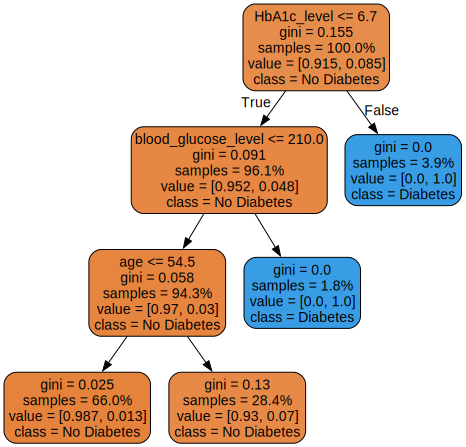

In [5]:
# Xuất mô hình cây ra định dạng DOT
dot_data = tree.export_graphviz(
    dt,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=X.columns,
    class_names=['No Diabetes', 'Diabetes'],
    proportion=True
)

# Hiển thị trực quan cây
graph = graphviz.Source(dot_data)
display(graph)


Cây quyết định hiển thị các nút phân tách (ví dụ: HbA1c_level, age, bmi...), giúp hiểu được thuộc tính nào ảnh hưởng nhiều nhất đến việc dự đoán mắc tiểu đường.

Các nhánh màu đậm biểu thị phân loại rõ ràng (đa số thuộc 1 lớp).

Có thể thấy “HbA1c_level” và “blood_glucose_level” thường là những đặc trưng quan trọng nhất.

## Nhiệm vụ 2: Tìm tham số tối ưu cho cây quyết định bằng GridSearchCV và vẽ biểu đồ đánh giá mô hình với các tham số khác nhau

### Bước 1:Dùng GridSearchCV để tìm giá trị tối ưu cho tham số max_depth.

In [6]:
from sklearn.model_selection import GridSearchCV

# 1️ Thiết lập các giá trị max_depth để thử nghiệm
params = {'max_depth': [1, 2, 4, 6, 8, 10, 12]}

Dùng GridSearchCV để thử nhiều giá trị max_depth.

roc_auc là thước đo phản ánh khả năng phân biệt giữa 2 lớp.

Sau khi chạy, cv.best_params_ cho biết độ sâu cây phù hợp nhất, thường là khoảng 4–6.

### Bước 2: Đánh giá mô hình bằng thước đo ROC AUC để đo khả năng phân loại.

In [7]:
dt_model = tree.DecisionTreeClassifier(random_state=42)
cv = GridSearchCV(
    dt_model,
    param_grid=params,
    scoring='roc_auc',
    cv=4,
    verbose=1,
    return_train_score=True
)

Sử dụng GridSearchCV để thử nhiều giá trị max_depth (độ sâu cây).

Thước đo được chọn là ROC AUC, giúp đánh giá khả năng phân biệt giữa hai lớp (có/không tiểu đường).

cv=4 nghĩa là chia tập train thành 4 phần để kiểm tra chéo, giúp kết quả đáng tin cậy hơn.

Sau khi chạy xong, kết quả in ra cho biết độ sâu tốt nhất và điểm ROC AUC cao nhất.

### Bước 3:Biểu diễn trực quan kết quả bằng biểu đồ thể hiện sự thay đổi hiệu suất theo độ sâu của cây.

Fitting 4 folds for each of 7 candidates, totalling 28 fits

🌟 Tham số tốt nhất: {'max_depth': 10}
🎯 Điểm ROC AUC tốt nhất: 0.9731


c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


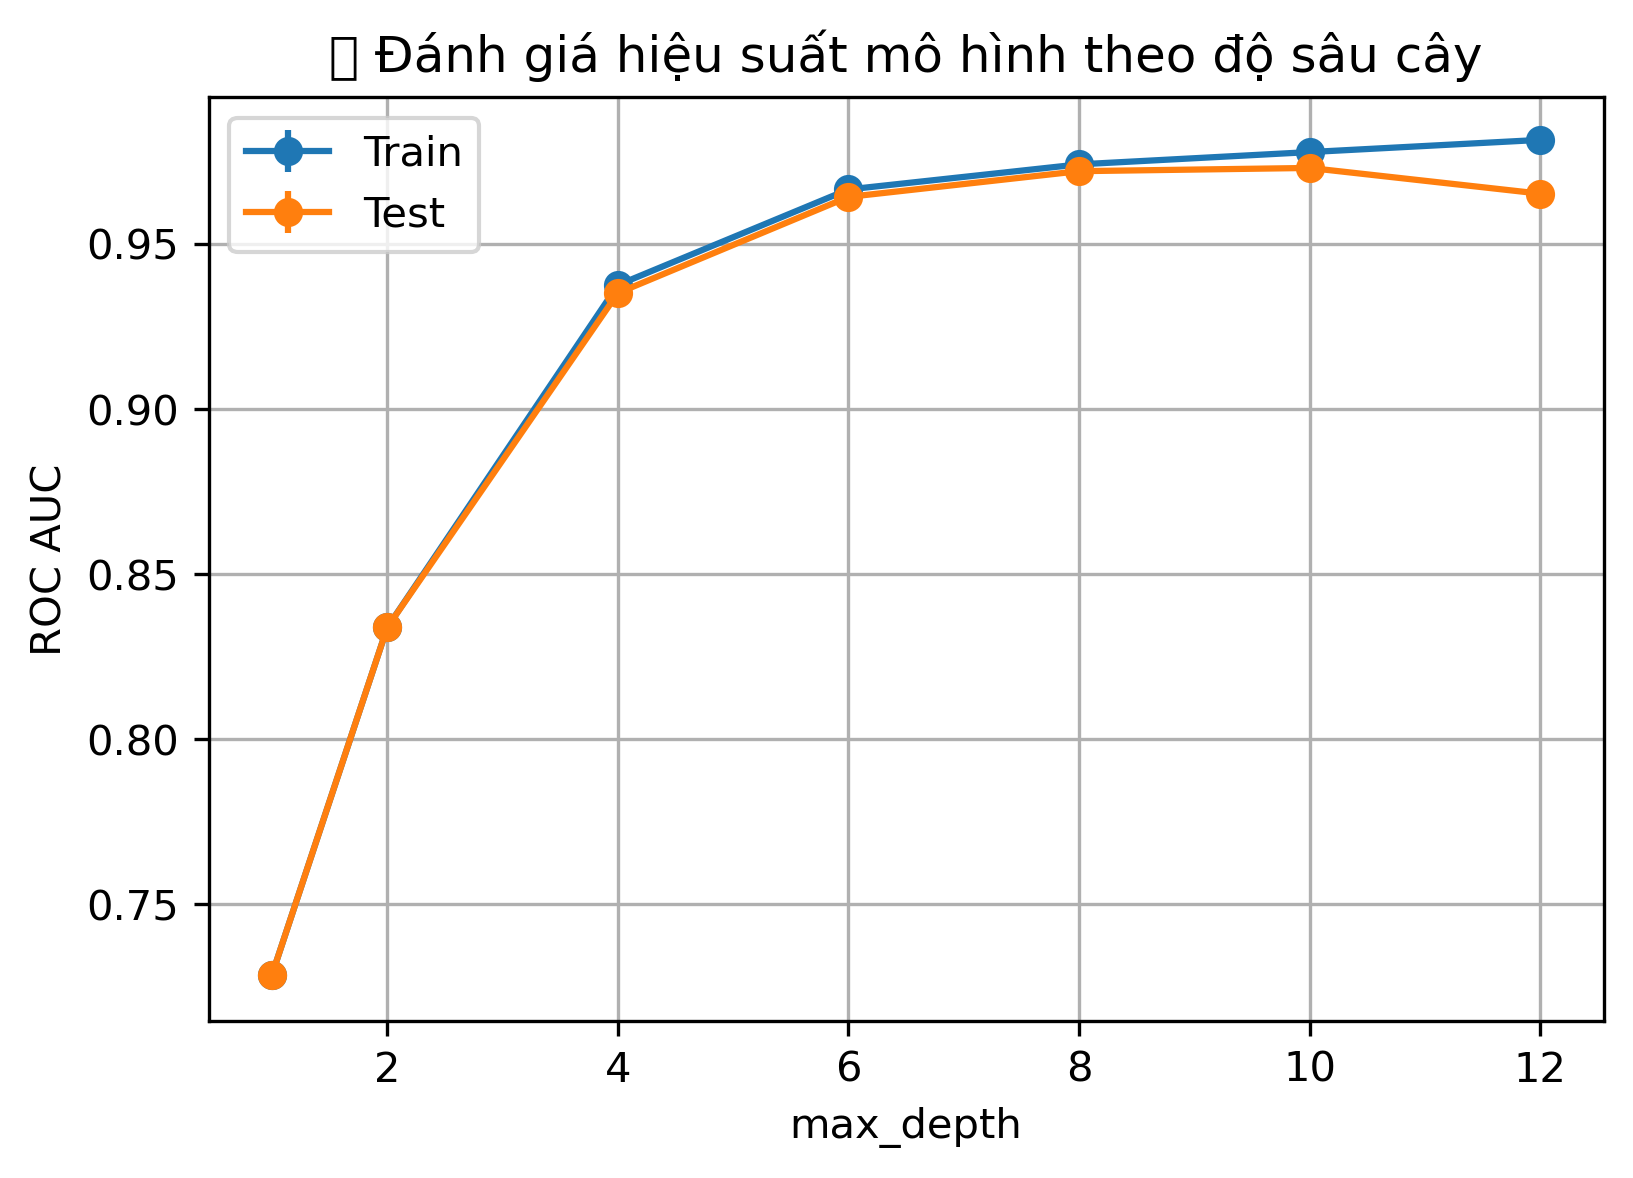

In [8]:
cv.fit(X_train, y_train)

print("\n🌟 Tham số tốt nhất:", cv.best_params_)
print("🎯 Điểm ROC AUC tốt nhất:", round(cv.best_score_, 4))

# 4️⃣ Vẽ biểu đồ so sánh hiệu suất với các giá trị max_depth khác nhau
cv_results_df = pd.DataFrame(cv.cv_results_)

plt.figure(figsize=(6, 4))
plt.errorbar(cv_results_df['param_max_depth'],
             cv_results_df['mean_train_score'],
             yerr=cv_results_df['std_train_score']/np.sqrt(4),
             label='Train', fmt='-o')
plt.errorbar(cv_results_df['param_max_depth'],
             cv_results_df['mean_test_score'],
             yerr=cv_results_df['std_test_score']/np.sqrt(4),
             label='Test', fmt='-o')

plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.title('🎯 Đánh giá hiệu suất mô hình theo độ sâu cây')
plt.legend()
plt.grid(True)
plt.show()

Biểu đồ thể hiện sự thay đổi hiệu suất khi độ sâu cây tăng.

Đường màu cam (Test) đạt đỉnh tại max_depth tối ưu, sau đó giảm dần khi cây quá sâu.

Đường màu xanh (Train) liên tục tăng → chứng tỏ khi cây càng sâu thì mô hình càng nhớ dữ liệu huấn luyện (overfit).

Nên chọn max_depth tại điểm “cân bằng” giữa train và test – đó là nơi mô hình tổng quát tốt nhất.

## Nhiệm vụ 3: Xây dựng rừng cây (random forest)

### Bước 1: Khởi tạo mô hình RandomForestClassifier với một số tham số cơ bản.

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=10,
    criterion='gini',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

rf.fit(X_train, y_train)
print("✅ Mô hình rừng cây đã huấn luyện xong!")
print("🎯 Độ chính xác Train:", round(rf.score(X_train, y_train), 4))
print("🎯 Độ chính xác Test:", round(rf.score(X_test, y_test), 4))

✅ Mô hình rừng cây đã huấn luyện xong!
🎯 Độ chính xác Train: 0.9712
🎯 Độ chính xác Test: 0.9717


Random Forest là mô hình kết hợp nhiều cây quyết định → giúp giảm sai số và tăng độ ổn định.

Tham số n_estimators=10 nghĩa là mô hình ban đầu gồm 10 cây.

Sau khi huấn luyện, kết quả in ra hai độ chính xác:

Train Accuracy: Mức độ mô hình khớp với dữ liệu huấn luyện.

Test Accuracy: Mức độ mô hình dự đoán đúng trên dữ liệu chưa thấy.

Nếu train cao nhưng test thấp → mô hình cần điều chỉnh.

Trong thực tế, rừng cây thường có kết quả tốt hơn cây đơn vì giảm overfitting.

### Bước 2: Dùng GridSearchCV để tìm số lượng cây (n_estimators) tối ưu.

In [10]:
rf_params_ex = {'n_estimators': list(range(10, 110, 10))}
cv_rf_ex = GridSearchCV(
    rf,
    param_grid=rf_params_ex,
    scoring='roc_auc',
    refit=True,
    cv=4,
    verbose=1,
    return_train_score=True
)
cv_rf_ex.fit(X_train, y_train)

print("\n🌟 Số cây tốt nhất:", cv_rf_ex.best_params_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits

🌟 Số cây tốt nhất: {'n_estimators': 50}


Dùng GridSearchCV để tìm số lượng cây (n_estimators) giúp mô hình đạt hiệu suất cao nhất.

Giá trị n_estimators được thử từ 10 đến 100 (tăng mỗi 10 cây).

Khi tăng số lượng cây, mô hình sẽ ổn định hơn nhưng tốn thời gian huấn luyện hơn.

Sau khi chạy, best_params_ hiển thị số lượng cây tối ưu (thường từ 50–80 cây).

### Bước 3: Vẽ biểu đồ thể hiện hiệu suất và thời gian huấn luyện tương ứng với số cây.

C:\Users\HP\AppData\Local\Temp\ipykernel_15516\3706679453.py:19: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_15516\3706679453.py:19: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


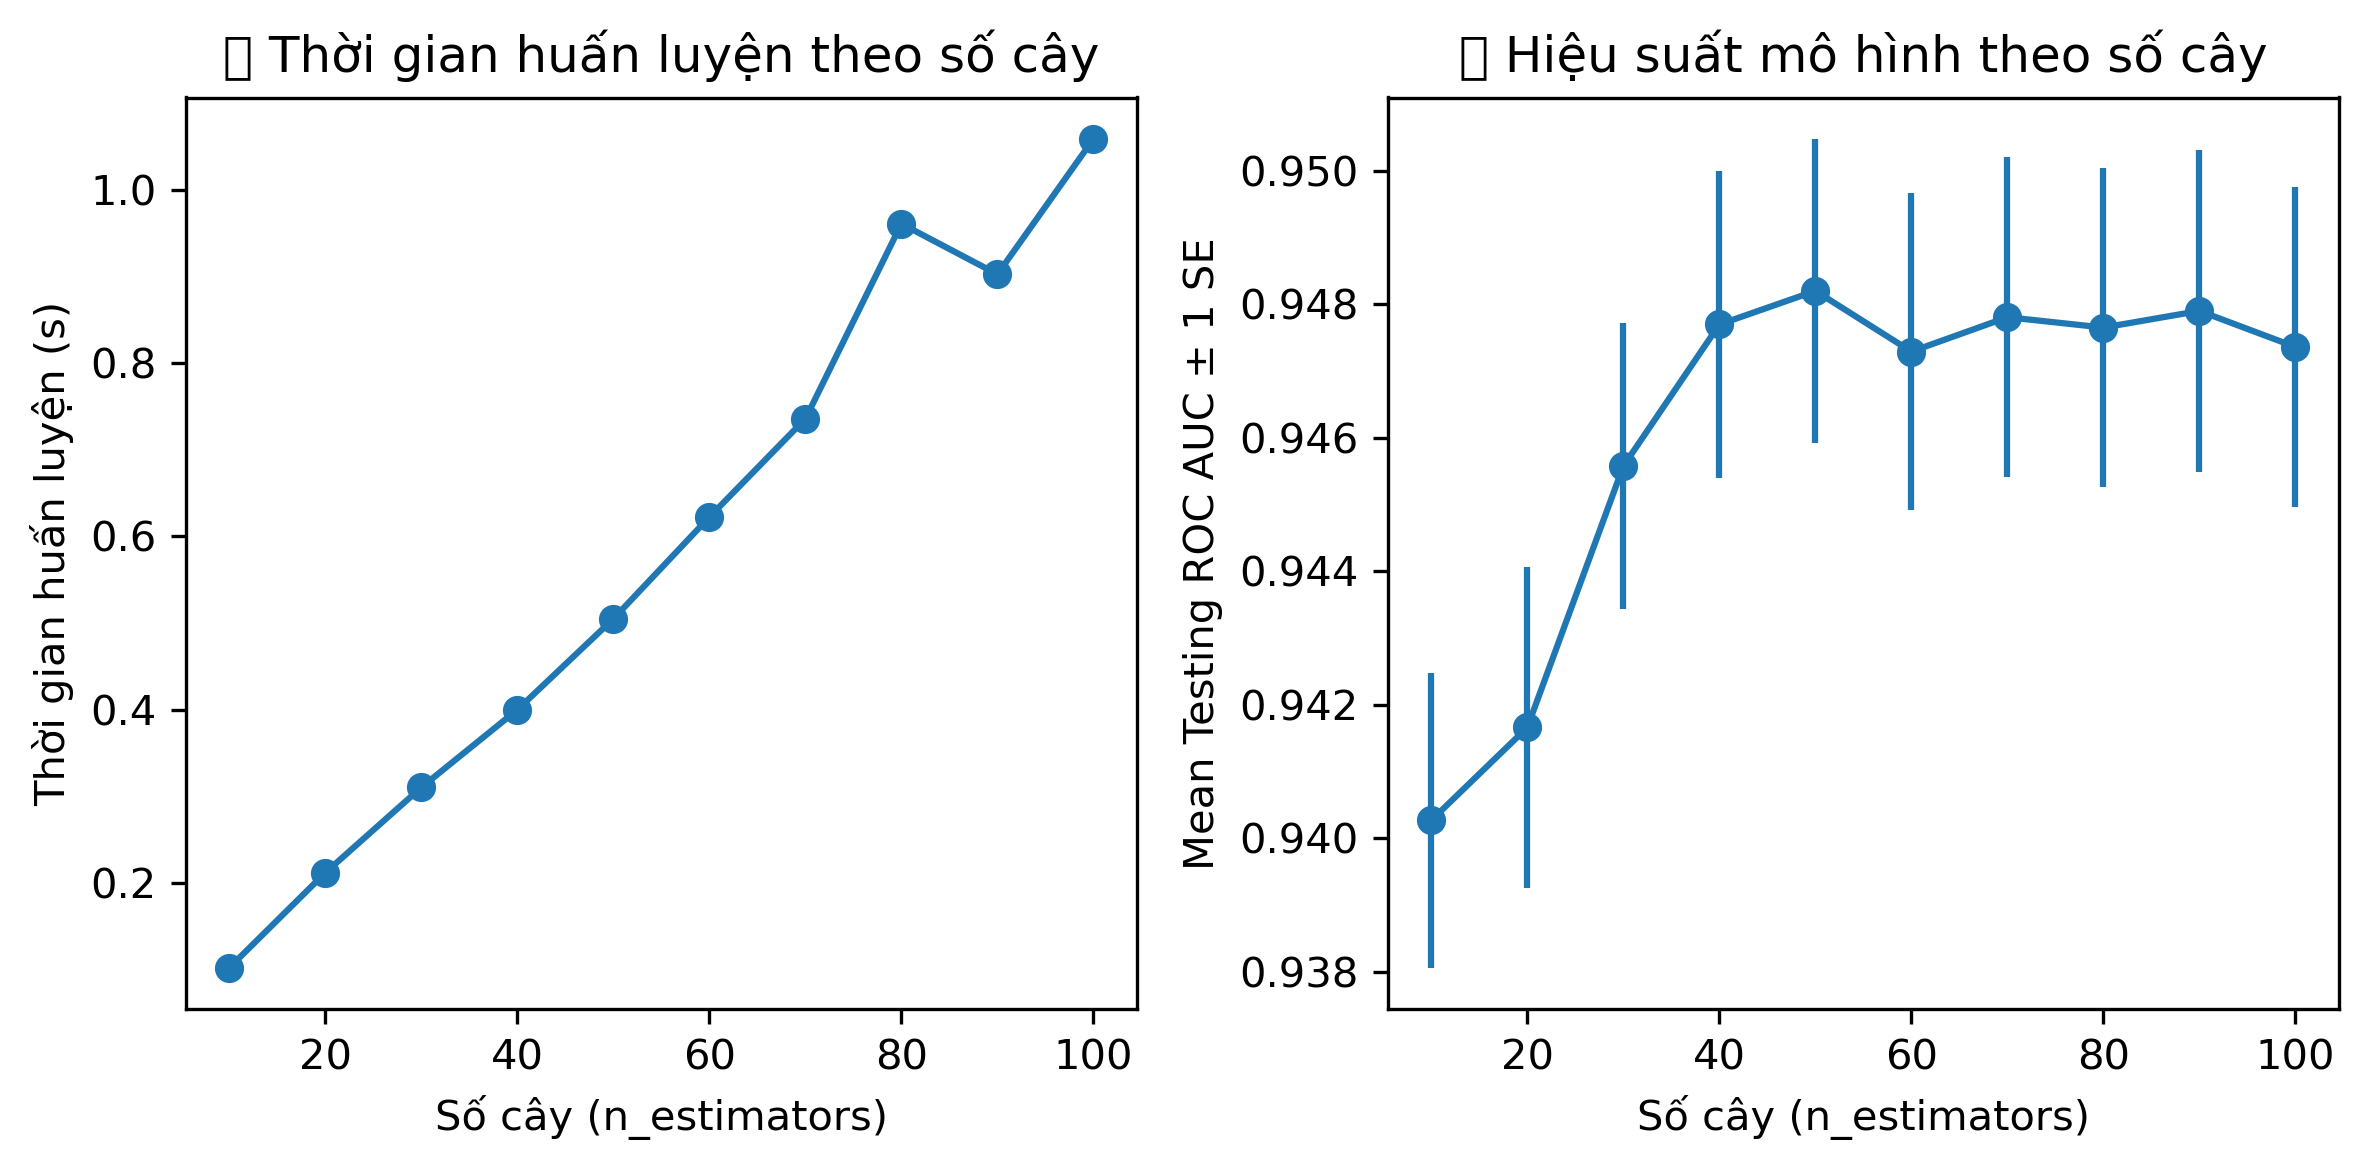

In [11]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'], '-o')
axs[0].set_xlabel('Số cây (n_estimators)')
axs[0].set_ylabel('Thời gian huấn luyện (s)')
axs[0].set_title('⏱ Thời gian huấn luyện theo số cây')

axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4),
                fmt='-o')
axs[1].set_xlabel('Số cây (n_estimators)')
axs[1].set_ylabel('Mean Testing ROC AUC ± 1 SE')
axs[1].set_title('🎯 Hiệu suất mô hình theo số cây')

plt.tight_layout()
plt.show()

Biểu đồ bên trái: cho thấy thời gian huấn luyện tăng tuyến tính khi số lượng cây nhiều hơn.

Biểu đồ bên phải: thể hiện hiệu suất ROC AUC tăng dần và sau đó ổn định → cho thấy rừng cây càng nhiều thì mô hình càng chính xác đến một mức nhất định.

Từ khoảng 60 cây trở đi, hiệu suất gần như không tăng thêm → chọn giá trị này là hợp lý.

### Bước 4: Trực quan hóa mức độ quan trọng (feature importance) của các biến trong mô hình.

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


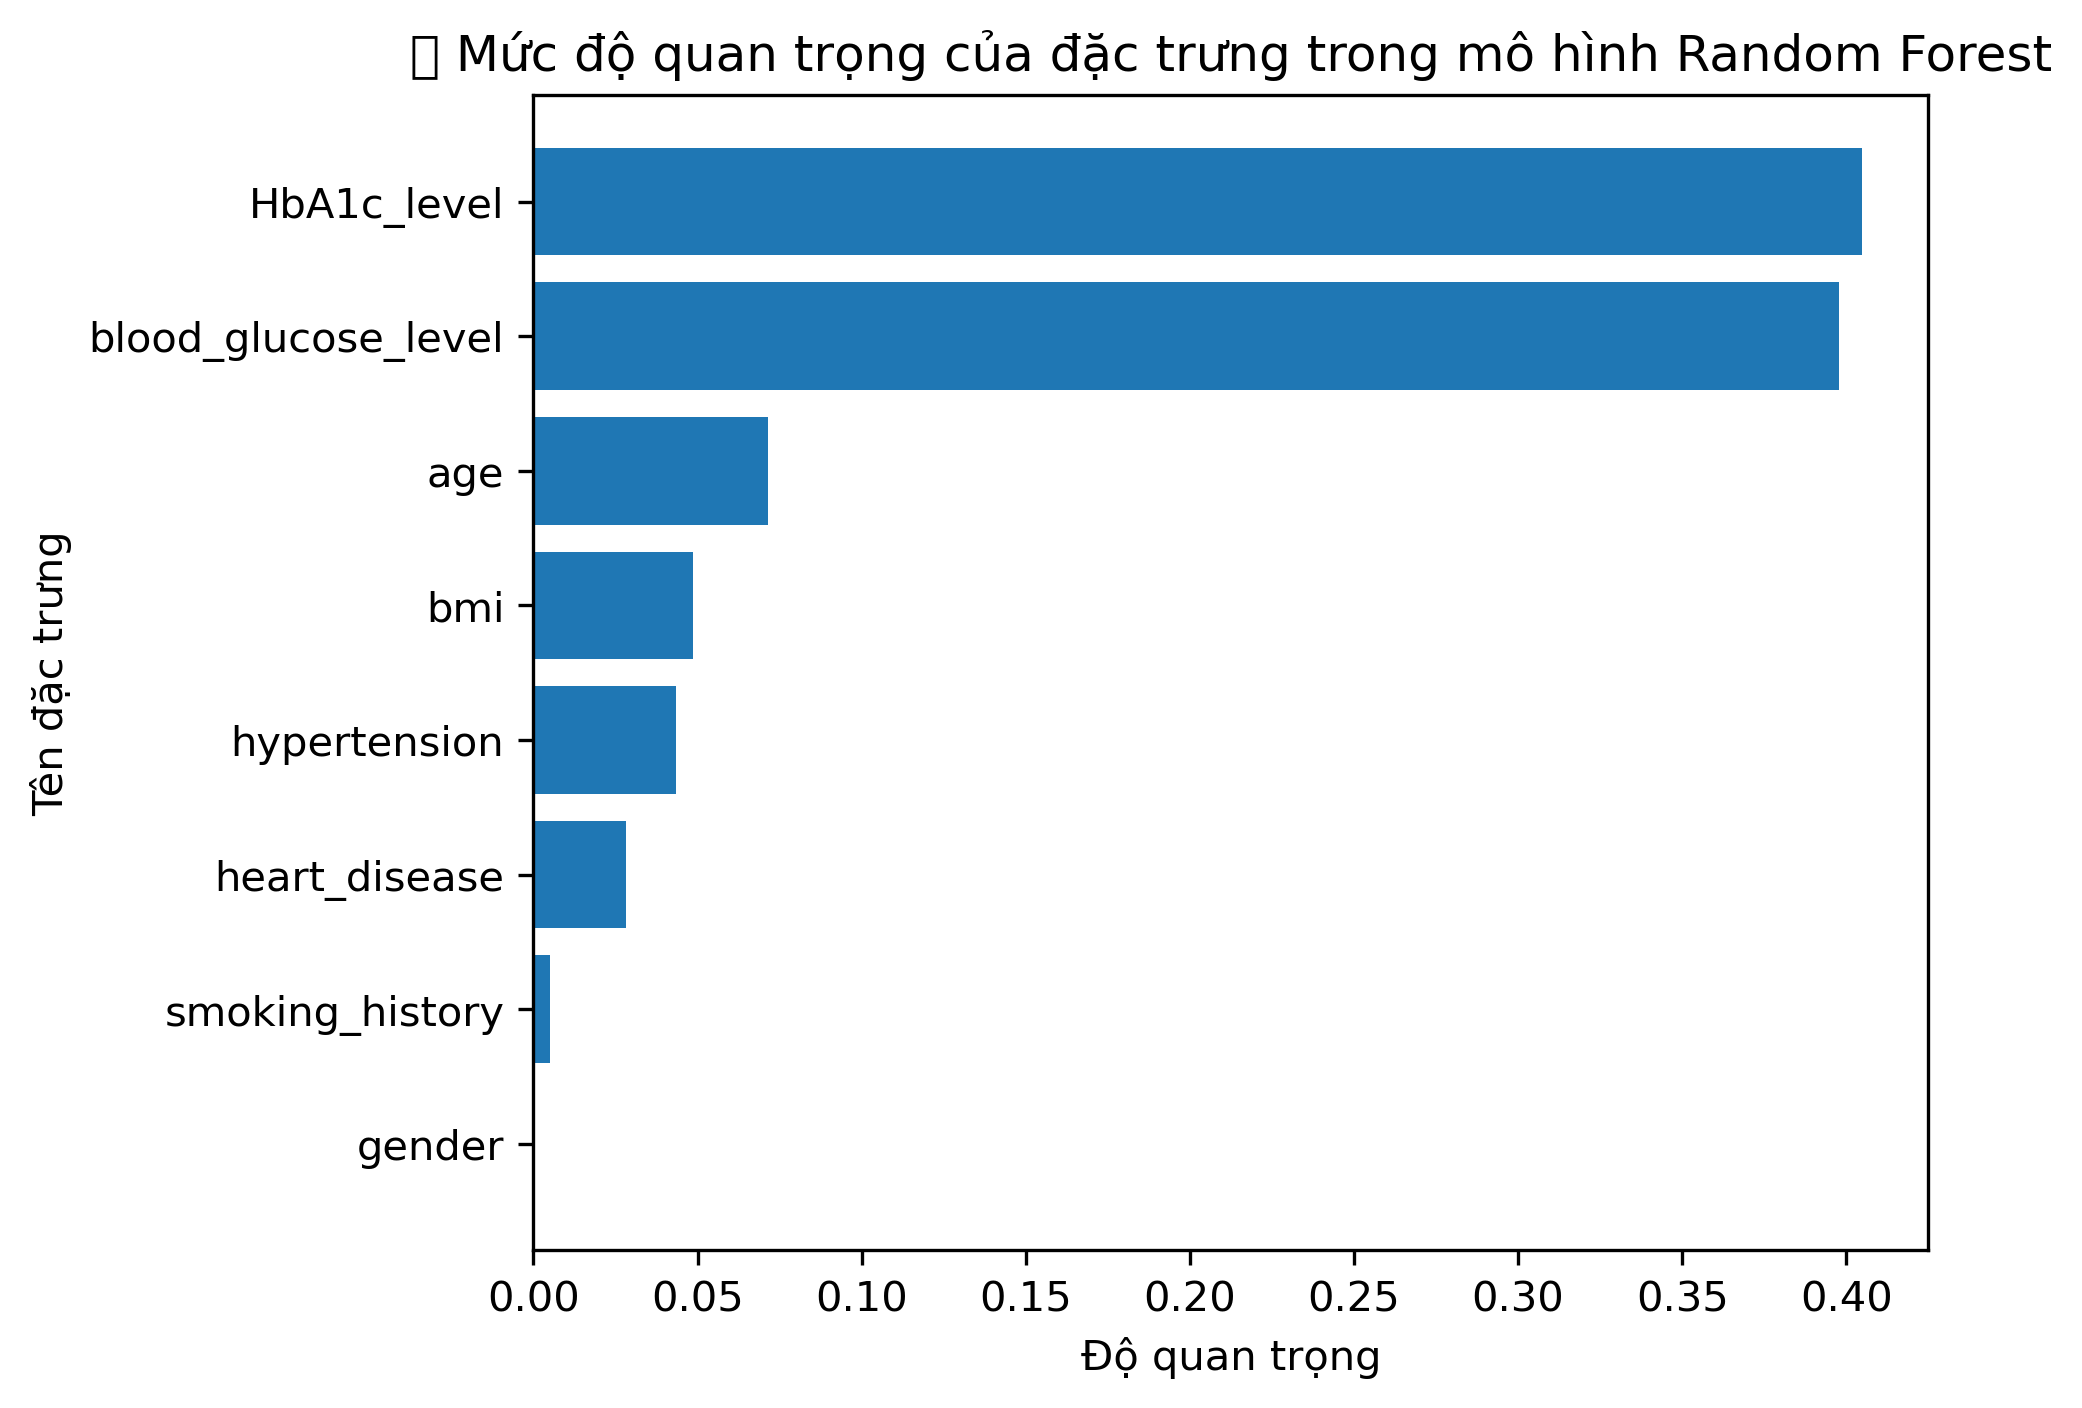

In [12]:
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': cv_rf_ex.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(6, 5))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.title('📈 Mức độ quan trọng của đặc trưng trong mô hình Random Forest')
plt.xlabel('Độ quan trọng')
plt.ylabel('Tên đặc trưng')
plt.show()

Biểu đồ hiển thị Feature Importance – tức là tầm quan trọng của từng đặc trưng trong quá trình dự đoán.

Các cột có giá trị cao hơn ảnh hưởng mạnh hơn đến kết quả phân loại.

Thông thường, HbA1c_level và blood_glucose_level là hai yếu tố quyết định mạnh nhất đến khả năng mắc tiểu đường.

Những cột như giới tính hay hút thuốc có giá trị thấp → ít ảnh hưởng hơn.

Đây là ưu điểm lớn của Random Forest: giúp giải thích mô hình và xác định yếu tố ảnh hưởng chính.